<a href="https://colab.research.google.com/github/faradishaldina/Faradisha_PCVK/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Faradisha A - 2141720159 - TI 3I**

## **MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction, Image Depth, PSNR, Average Denoising, Image Masking**

**TUGAS PRAKTIKUM**

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Make a Gamma Correction**

 Gamma correction of the image 
----------------------------------
Enter the Gamma value: 3


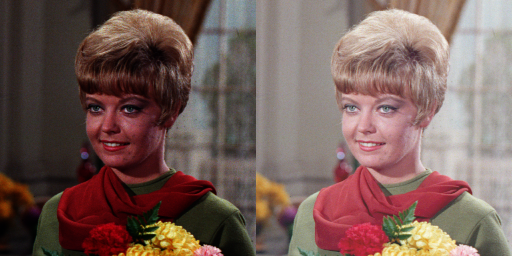

In [ ]:
print(' Gamma correction of the image ')
print('----------------------------------')
try:
 gamma = int(input('Enter the Gamma value: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_Fara/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

**2. Create Image Depth Simulation**

 Image Depth Simulation  
--------------------------
Enter the Bit Depth value: 4


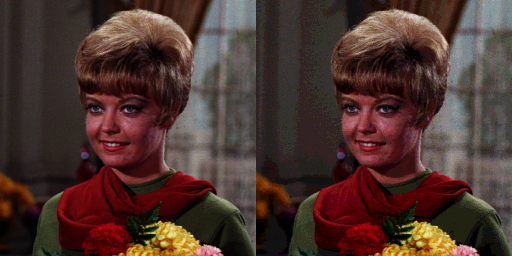

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK_Fara/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

print(' Image Depth Simulation  ')
print('--------------------------')
try:
  bd = float(input('Enter the Bit Depth value: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

**3. Create the Average Denoising module**

> **3.1 (Citra 5)**

The PSNR value is 27.551851002308105 (dB)


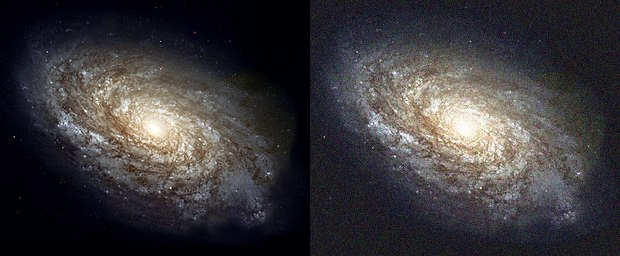

In [ ]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK_Fara/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_Fara/noises/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('The PSNR value is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

> **3.2 (Citra 30)**

The PSNR value is 27.520551686956097 (dB)


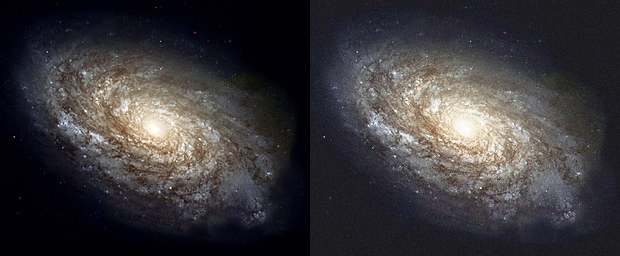

In [ ]:
dst = cv_img[0]
noise_number = 29 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('The PSNR value is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

> **3.3 (Citra 60)**

The PSNR value is 27.497351616339092 (dB)


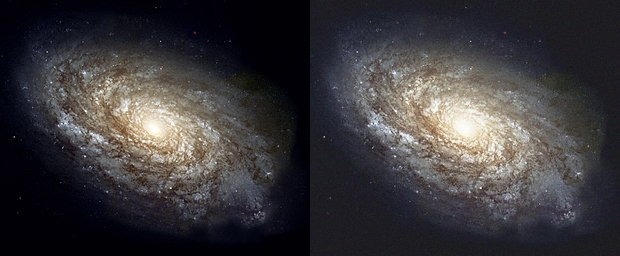

In [ ]:
dst = cv_img[0]
noise_number = 59 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('The PSNR value is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

> **3.4 (Citra 80)**

The PSNR value is 27.505931640008917 (dB)


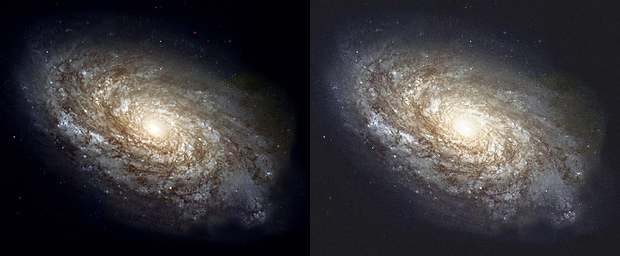

In [ ]:
dst = cv_img[0]
noise_number = 79 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('The PSNR value is',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

> **3.5 (Citra 100)**

Nilai PSNR adalah 27.512170873584402 (dB)


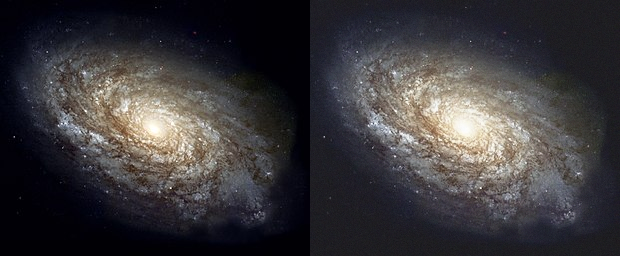

In [ ]:
dst = cv_img[0]
noise_number = 99 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

**4. Create image masking**

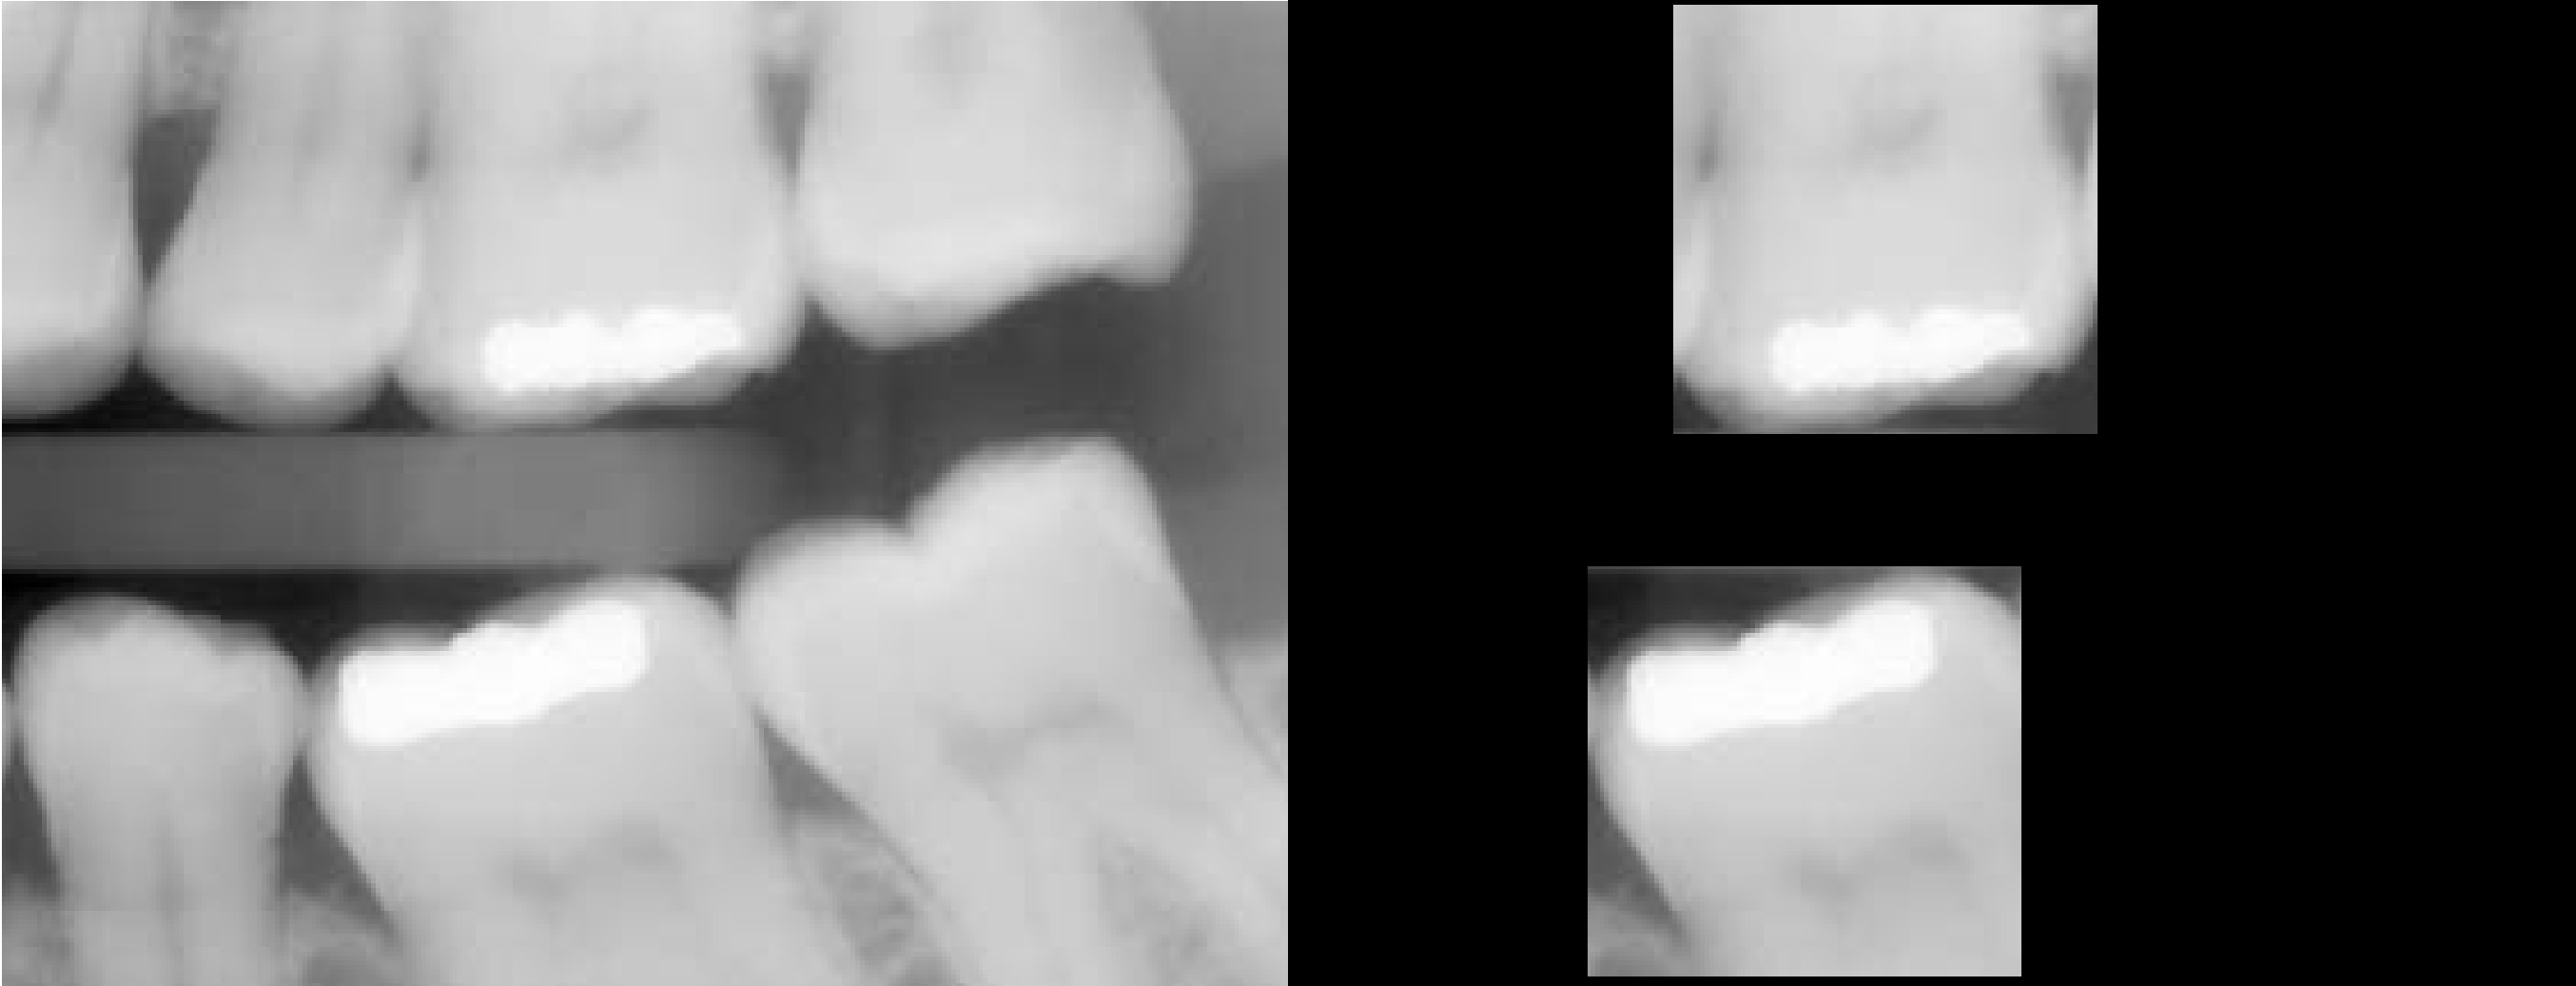

In [ ]:
img_teeth = cv.imread('/content/drive/MyDrive/PCVK_Fara/teeth.jpg')

mask = np.zeros(img_teeth.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = img_teeth & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img_teeth & mask1

teeth_frame = cv.hconcat((img_teeth, result))
cv2_imshow(teeth_frame)

**5. Image Masking Logic Operation**

***Example of AND Operator***

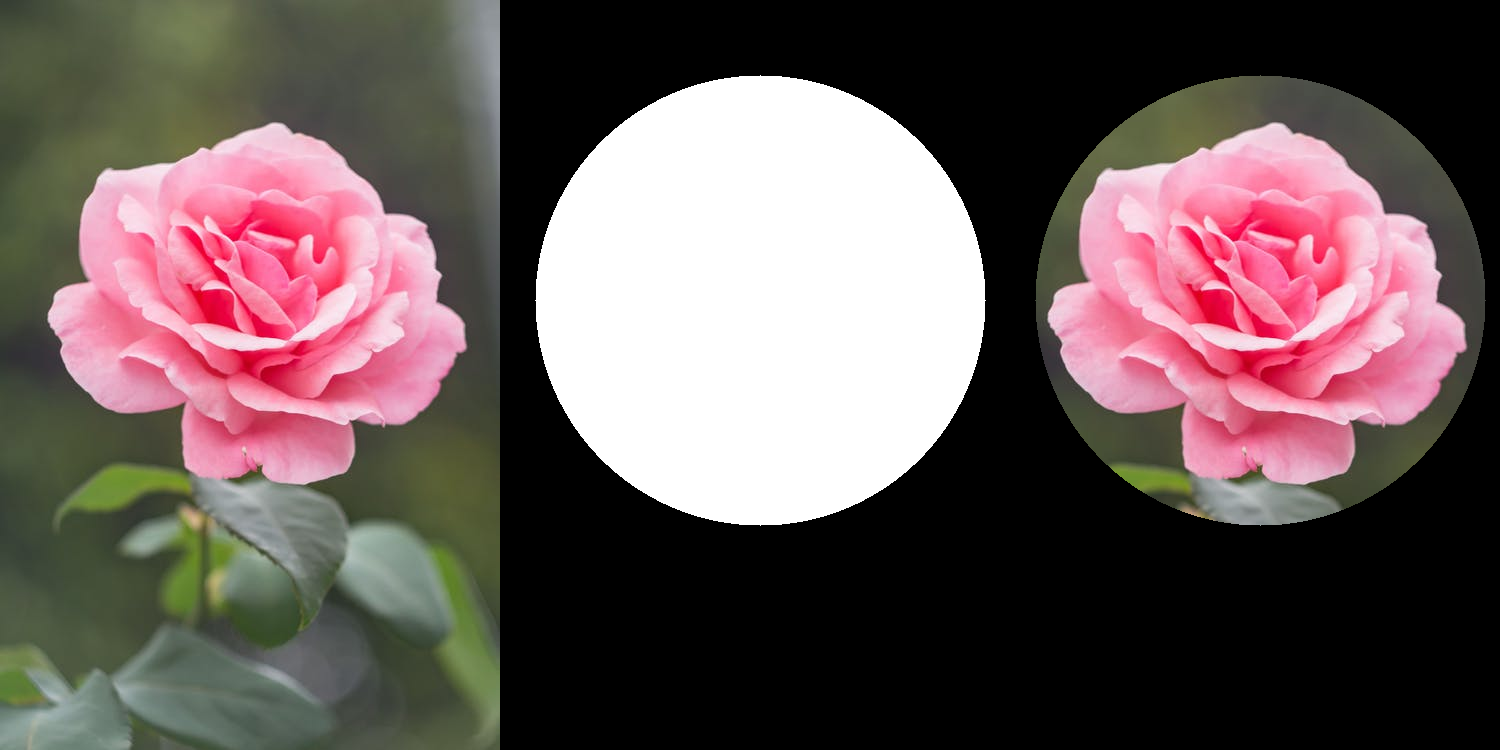

In [ ]:
img_rose = cv.imread('/content/drive/MyDrive/PCVK_Fara/rose_pink.png')

mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

> **5.1 OR**

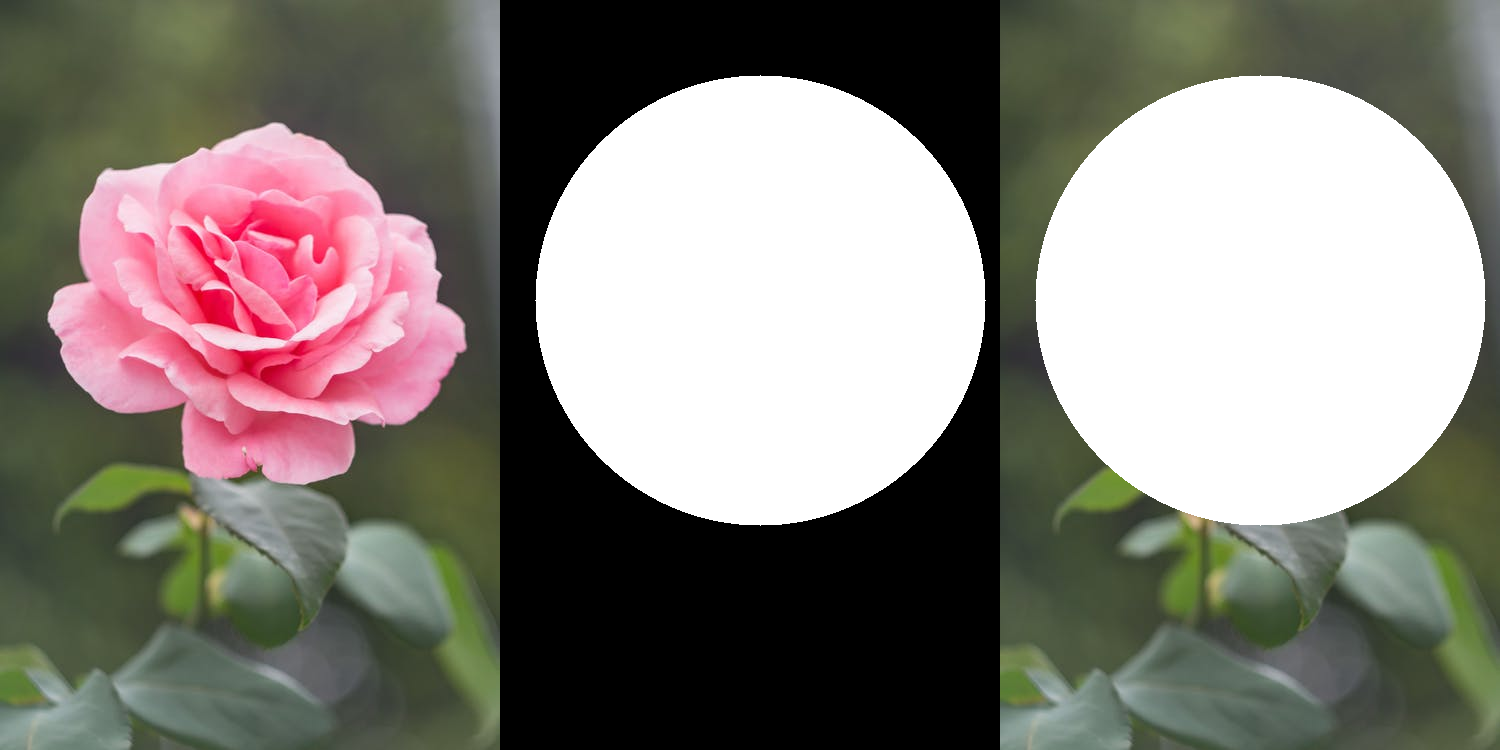

In [ ]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

> **5.2 NOT**

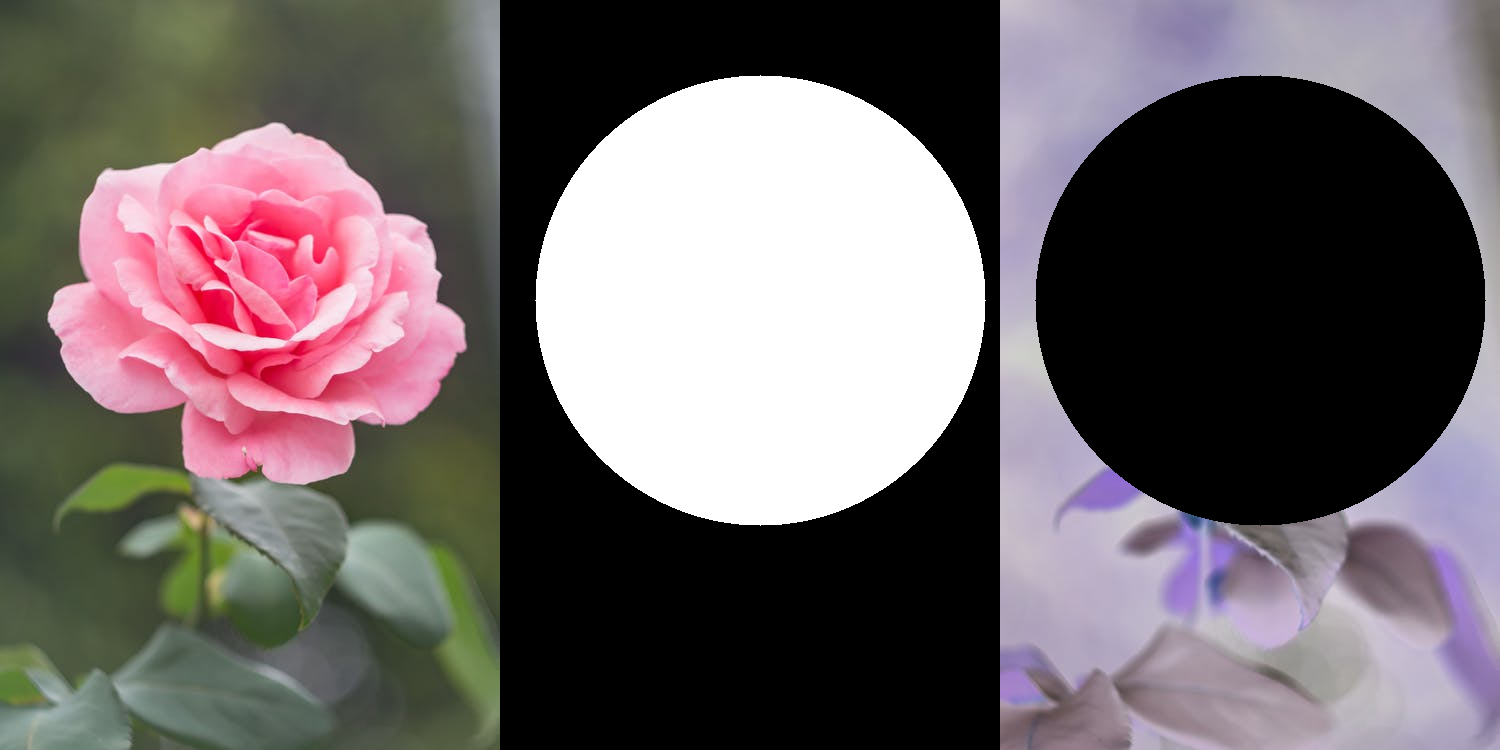

In [ ]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

> **5.3 NAND (Not AND)**

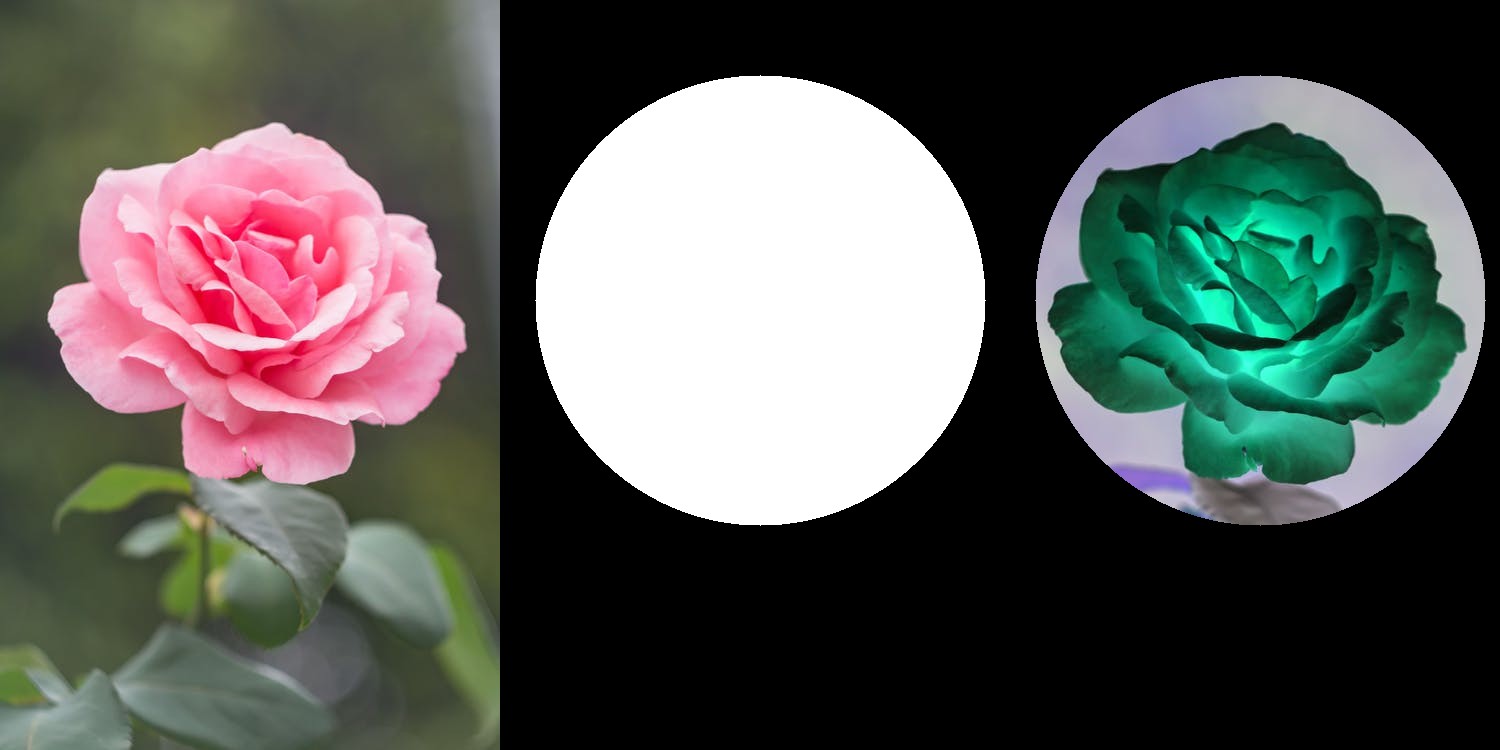

In [ ]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)


> **5.4 XOR (Exclusive OR)**

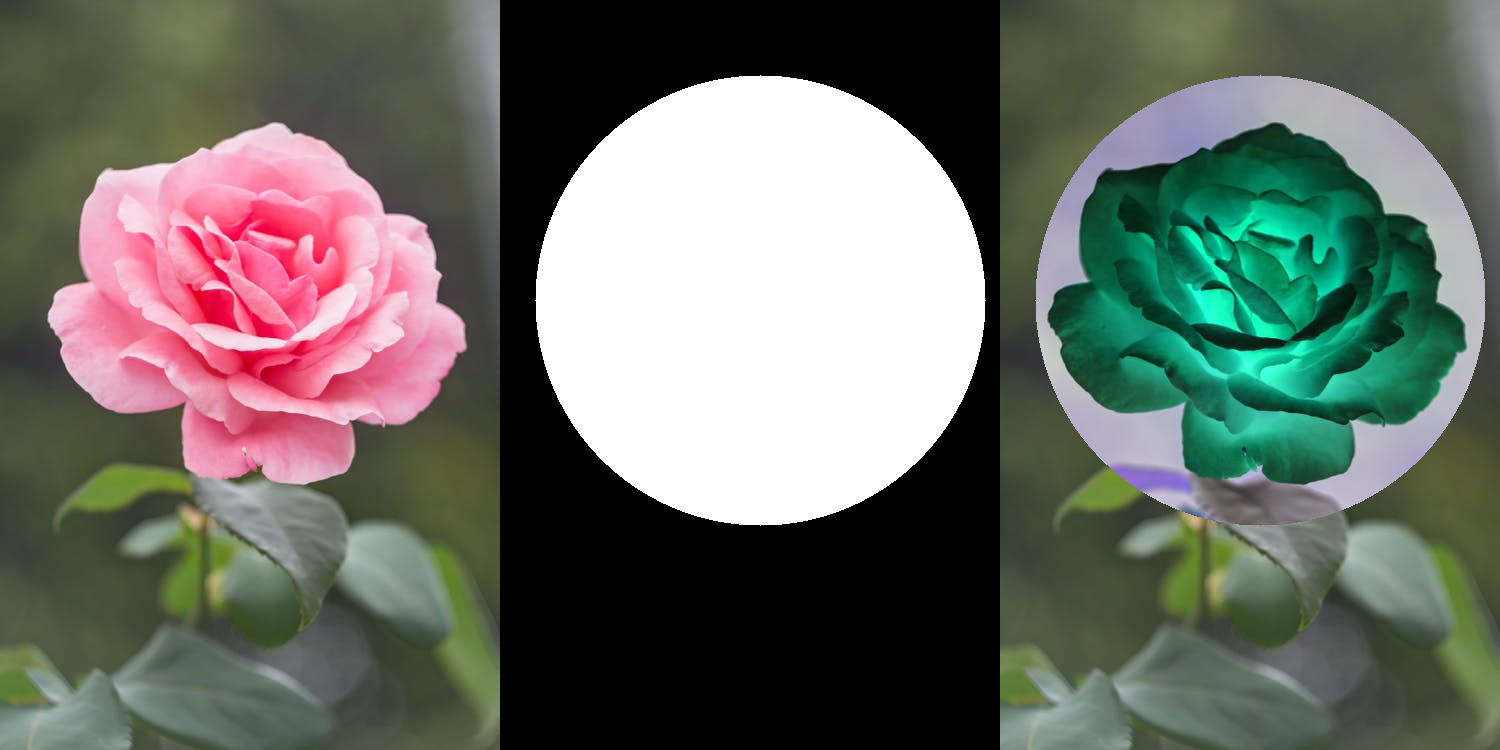

In [ ]:
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)